# Question 1

Introduction:

Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.

Occupations

Step 1. Import the necessary libraries

Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user).

Step 3. Assign it to a variable called users

Step 4. Discover what is the mean age per occupation

Step 5. Discover the Male ratio per occupation and sort it from the most to the least

Step 6. For each occupation, calculate the minimum and maximum ages

Step 7. For each combination of occupation and sex, calculate the mean age

Step 8. For each occupation present the percentage of women and men


In [1]:
# STEP - 1 : IMPORT NECESSARY LIBRARIES
import pandas as pd

In [2]:
# STEP - 2 : IMPORT THE DATASET FROM THE GIVEN ADDRESS (https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user)
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

In [3]:
# STEP - 3 : ASSIGN IT TO A VARIABLE CALLED USERS
users = pd.read_csv(url, sep='|')
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None


In [4]:
# STEP - 4 : DISCOVER WHAT IS THE MEAN AGE PEROCCUPATION
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_per_occupation)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [5]:
# Step - 5 : Discover the Male ratio per occupation and sort it from the most to the least

def male_ratio(series):
    return (series == 'M').sum() / len(series)

# Assuming 'users' is your DataFrame
male_ratio_per_occupation = users.groupby('occupation')['gender'].agg(male_ratio).sort_values(ascending=False)
print(male_ratio_per_occupation)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64


In [6]:
# Step - 6 : For each occupation, calculate the minimum and maximum ages
# THIS IS FOR FINDING min AGE

min_age_per_occupation = users.groupby('occupation')['age'].min()
print(min_age_per_occupation)

occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64


In [7]:
# THIS IS FOR FINDING max AGE

min_age_per_occupation = users.groupby('occupation')['age'].max()
print(min_age_per_occupation)

occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64


In [8]:
# Step - 7 : For each combination of occupation and sex, calculate the mean age
mean_age_per_occupation_and_gender = users.groupby(['occupation', 'gender'])['age'].mean()
print(mean_age_per_occupation_and_gender)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [9]:
# STEP - 8 : For each occupation present the percentage of women and men
def calculate_gender_percentage(group):
    total_count = group['gender'].count()
    female_percentage = (group['gender'] == 'F').sum() / total_count * 100
    male_percentage = (group['gender'] == 'M').sum() / total_count * 100
    return female_percentage, male_percentage

gender_percentages_by_occupation = users.groupby('occupation').apply(calculate_gender_percentage)
female_percentages_by_occupation = gender_percentages_by_occupation.apply(lambda x: x[0])
male_percentages_by_occupation = gender_percentages_by_occupation.apply(lambda x: x[1])


In [10]:
# for finding male percentage_by_occupation
print(male_percentages_by_occupation)

occupation
administrator     54.430380
artist            53.571429
doctor           100.000000
educator          72.631579
engineer          97.014925
entertainment     88.888889
executive         90.625000
healthcare        31.250000
homemaker         14.285714
lawyer            83.333333
librarian         43.137255
marketing         61.538462
none              55.555556
other             65.714286
programmer        90.909091
retired           92.857143
salesman          75.000000
scientist         90.322581
student           69.387755
technician        96.296296
writer            57.777778
dtype: float64


In [11]:
# for finding female percentage_by_occupation
print(female_percentages_by_occupation)

occupation
administrator    45.569620
artist           46.428571
doctor            0.000000
educator         27.368421
engineer          2.985075
entertainment    11.111111
executive         9.375000
healthcare       68.750000
homemaker        85.714286
lawyer           16.666667
librarian        56.862745
marketing        38.461538
none             44.444444
other            34.285714
programmer        9.090909
retired           7.142857
salesman         25.000000
scientist         9.677419
student          30.612245
technician        3.703704
writer           42.222222
dtype: float64


# QUESTION 2

Euro Teams

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address

Step 3. Assign it to a variable called euro12

Step 4. Select only the Goal column

Step 5. How many team participated in the Euro2012?

Step 6. What is the number of columns in the dataset?

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

Step 8. Sort the teams by Red Cards, then to Yellow Cards

Step 9. Calculate the mean Yellow Cards given per Team

Step 10. Filter teams that scored more than 6 goals

Step 11. Select the teams that start with G

Step 12. Select the first 7 columns

Step 13. Select all columns except the last 3

Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [12]:
# STEP - 1 : Import the necessary libraries
import pandas as pd

In [13]:
# Step 2. Import the dataset from this address
dataset = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

In [14]:
# Step 3. Assign it to a variable called euro12
euro12 = pd.read_csv(dataset)
print(euro12.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

In [15]:
# Step 4. Select only the Goal column
only_goals = euro12['Goals']
print(only_goals)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [16]:
# Step 5. How many team participated in the Euro2012?
teams_participated = euro12['Team'].nunique()
print(teams_participated)

16


In [17]:
# Step 6. What is the number of columns in the dataset?
number_of_columns = len(euro12.columns)
print(number_of_columns)

35


In [18]:
# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline


,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [19]:
# Step 8. Sort the teams by Red Cards, then to Yellow Cards
yello_red_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])
yello_red_sorted

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [20]:
# Step 9. Calculate the mean Yellow Cards given per Team
calculate_yellow_cards = round(discipline['Yellow Cards'].mean())
print(calculate_yellow_cards)

7


In [21]:
# Step 10 - Filter teams that scored more than 6 goals
team_more_than_6goals = euro12[euro12['Goals'] > 6]
team_more_than_6goals

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [22]:
# Step 11. Select the teams that start with G
teams_start_with_G = euro12[euro12['Team'].str.startswith('G')]
teams_start_with_G

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [23]:
# Step 12. Select the first 7 columns
first_7_columns = euro12[euro12.columns[:7]]
first_7_columns

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [24]:
# Step 13. Select all columns except the last 3
except_last_3_columns = euro12.iloc[:, :-3]
except_last_3_columns

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [25]:
# Step 14. Present only the Shooting Accuracy from England, Italy and Russia
selected_teams = ['England', 'Italy', 'Russia']
shooting_accuracy = euro12.loc[euro12['Team'].isin(selected_teams), ['Team', 'Shooting Accuracy']]
shooting_accuracy

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

Housing

Step 1. Import the necessary libraries

Step 2. Create 3 differents Series, each of length 100, as follows:

The first a random number from 1 to 4

The second a random number from 1 to 3

The third a random number from 10,000 to 30,000


Step 3. Create a DataFrame by joinning the Series by column

Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

Step 6. Ops it seems it is going only until index 99. Is it true?

Step 7. Reindex the DataFrame so it goes from 0 to 299

In [26]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [27]:
# Step 2. Create 3 differents Series, each of length 100, as follows:
first_series = pd.Series(np.random.randint(1, 5, size=100))
second_series = pd.Series(np.random.randint(1, 4, size=100))
third_series = pd.Series(np.random.randint(10000, 30001, size=100))

In [28]:
# Step 3. Create a DataFrame by joinning the Series by column
dataframe = pd.DataFrame({'Series_1': first_series, 'Series_2': second_series, 'Series_3': third_series})
dataframe

,Series_1,Series_2,Series_3
0,3,2,20461
1,2,1,17277
2,2,2,10073
3,4,2,18949
4,2,3,22487
...,...,...,...
95,4,3,10856
96,2,2,16107
97,4,3,22124
98,1,3,11342


In [29]:
# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
dataframe.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
dataframe

,bedrs,bathrs,price_sqr_meter
0,3,2,20461
1,2,1,17277
2,2,2,10073
3,4,2,18949
4,2,3,22487
...,...,...,...
95,4,3,10856
96,2,2,16107
97,4,3,22124
98,1,3,11342


In [30]:
# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([first_series, second_series, third_series], axis=0)
bigcolumn = bigcolumn.to_frame()
bigcolumn

,0
0,3
1,2
2,2
3,4
4,2
...,...
95,10856
96,16107
97,22124
98,11342


In [31]:
# Step 6. Ops it seems it is going only until index 99. Is it true?
print(bigcolumn.index.max() == 99)

True


In [32]:
# Step 7. Reindex the DataFrame so it goes from 0 to 299
bigcolumn = bigcolumn.reset_index(drop=True)
bigcolumn

,0
0,3
1,2
2,2
3,4
4,2
...,...
295,10856
296,16107
297,22124
298,11342


# Question 4

Wind Statistics

The data have been modified to contain some missing values, identified by NaN. Using pandas should make this exercise easier, in particular for the bonus question.

You should be able to perform all of these operations without using a for loop or other looping construct.

The data in 'wind.data' has the following format:

Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.

Step 1. Import the necessary libraries

Step 2. Import the dataset from the attached file wind.txt

Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

Step 6. Compute how many values are missing for each location over the entire record. They should be ignored in all calculations below.

Step 7. Compute how many non-missing values there are in total.

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

A single number for the entire dataset.

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days.

A different set of numbers for each location.

Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

A different set of numbers for each day.

Step 11. Find the average windspeed in January for each location.

Treat January 1961 and January 1962 both as January.

Step 12. Downsample the record to a yearly frequency for each location.

Step 13. Downsample the record to a monthly frequency for each location.

Step 14. Downsample the record to a weekly frequency for each location.

Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [33]:
# step 1
import pandas as pd
import numpy as np
import datetime

In [34]:
# step 2 - Import the dataset from the attached file wind.txt
data = pd.read_csv("wind.txt", delim_whitespace=True, parse_dates=[[0, 1, 2]])


In [35]:
# step 3 - Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [36]:
# step 4 - Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
def century(x):
  year = x.year - 100 if x.year > 1989 else x.year
  return datetime.date(year, x.month, x.day)

In [37]:
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(century)
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [38]:
# step 5 - Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])
data = data.set_index('Yr_Mo_Dy')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [39]:
# step 6 - Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
missing_values = data.isnull().sum(axis=0)
missing_values

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [40]:
# step 7 - Compute how many non-missing values there are in total.
non_missing = data.count()
non_missing

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [41]:
total_non_missing = data.count().sum()
total_non_missing

78857

In [42]:
# step 8 - Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
mean_windspeed = data.stack().mean()
mean_windspeed

10.22788376428218

In [43]:
# step 9 - Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
loc_stats = data.describe()
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.420000,11.190000,11.630000,16.880000,19.830000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [44]:
# step 10 - Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day
day_stats = data.groupby(data.index.date).agg(['min', 'max', 'mean', 'std'])
day_stats

RPT                      VAL                      ROS         \
              min    max   mean std    min    max   mean std    min    max   
1961-01-01  15.04  15.04  15.04 NaN  14.96  14.96  14.96 NaN  13.17  13.17   
1961-01-02  14.71  14.71  14.71 NaN    NaN    NaN    NaN NaN  10.83  10.83   
1961-01-03  18.50  18.50  18.50 NaN  16.88  16.88  16.88 NaN  12.33  12.33   
1961-01-04  10.58  10.58  10.58 NaN   6.63   6.63   6.63 NaN  11.75  11.75   
1961-01-05  13.33  13.33  13.33 NaN  13.25  13.25  13.25 NaN  11.42  11.42   
...           ...    ...    ...  ..    ...    ...    ...  ..    ...    ...   
1978-12-27  17.58  17.58  17.58 NaN  16.96  16.96  16.96 NaN  17.62  17.62   
1978-12-28  13.21  13.21  13.21 NaN   5.46   5.46   5.46 NaN  13.46  13.46   
1978-12-29  14.00  14.00  14.00 NaN  10.29  10.29  10.29 NaN  14.42  14.42   
1978-12-30  18.50  18.50  18.50 NaN  14.04  14.04  14.04 NaN  21.29  21.29   
1978-12-31  20.33  20.33  20.33 NaN  17.41  17.41  17.41 NaN  27.29  27.29   

            ...    CLO        BEL                      MAL                    
            ...   mean std    min    max   mean std    min    max   mean std  
1961-01-01  ...  12.58 NaN  18.50  18.50  18.50 NaN  15.04  15.04  15.04 NaN  
1961-01-02  ...   9.67 NaN  17.54  17.54  17.54 NaN  13.83  13.83  13.83 NaN  
1961-01-03  ...   7.67 NaN  12.75  12.75  12.75 NaN  12.71  12.71  12.71 NaN  
1961-01-04  ...   5.88 NaN   5.46   5.46   5.46 NaN  10.88  10.88  10.88 NaN  
1961-01-05  ...  10.34 NaN  12.92  12.92  12.92 NaN  11.83  11.83  11.83 NaN  
...         ...    ...  ..    ...    ...    ...  ..    ...    ...    ...  ..  
1978-12-27  ...  14.00 NaN  17.21  17.21  17.21 NaN  40.08  40.08  40.08 NaN  
1978-12-28  ...  18.05 NaN  21.79  21.79  21.79 NaN  41.46  41.46  41.46 NaN  
1978-12-29  ...  16.42 NaN  18.88  18.88  18.88 NaN  29.58  29.58  29.58 NaN  
1978-12-30  ...  12.12 NaN  14.67  14.67  14.67 NaN  28.79  28.79  28.79 NaN  
1978-12-31  ...  11.38 NaN  12.08  12.08  12.08 NaN  22.08  22.08  22.08 NaN  

[6574 rows x 48 columns]

In [45]:
day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis = 1)
day_stats['max'] = data.max(axis = 1)
day_stats['mean'] = data.mean(axis = 1)
day_stats['std'] = data.std(axis = 1)

day_stats

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [46]:
# step 11 -  Find the average windspeed in January for each location.Treat January 1961 and January 1962 both as January
avg_jan_windspeed = data[data.index.month == 1].mean()
avg_jan_windspeed

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [47]:
# step 12 -  Downsample the record to a yearly frequency for each location.
yearly_frequency = data.resample('Y').mean()
yearly_frequency

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [48]:
# step 13 - Downsample the record to a monthly frequency for each location
monthly_frequency = data.groupby(data.index.to_period('M')).mean()
monthly_frequency

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [49]:
# step 14 - Downsample the record to a weekly frequency for each location
weekly_frequency = data.groupby(data.index.to_period('W')).mean()
weekly_frequency 

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [50]:
# step 15 -  Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks

stats_52_weeks = data.resample('W').agg(['min', 'max', 'mean', 'std'])
selected_stats = stats_52_weeks.iloc[1:53].loc[:, "RPT":"MAL"]

selected_stats

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   
1961-03-26   6.29  15.00   9.567143  3.613298   2.58  11.63   8.387143   
1961-04-02   5.88  18.25  10.757143  5.046922   3.50  16.29   8.852857   
1961-04-09   4.50  18.12  11.964286  4.604392   7.04  14.62  10.654286   
1961-04-16   4.71  15.50   8.965714  3.937727   4.83  12.25   8.000000   
1961-04-23   4.00  21.09  12.621429  5.676655   3.71  15.41  10.438571   
1961-04-30   4.08  16.29  10.117143  4.349662   6.50  14.46   9.798571   
1961-05-07   9.87  23.00  15.367143  5.025507  10.29  19.79  13.970000   
1961-05-14   3.54  12.79   7.772857  3.371022   3.96  15.12   8.712857   
1961-05-21   4.88  15.04   8.225714  3.631730   3.58  10.17   5.631667   
1961-05-28   4.96  11.79   8.155714  2.739433   3.67  12.50   7.388571   
1961-06-04   7.00  15.92  10.321429  3.099701   4.75   9.79   7.407143   
1961-06-11   8.29  14.42  10.917143  2.248597   6.83  11.54   8.992857   
1961-06-18   6.13  14.33  10.571429  3.009482   4.12  14.54   9.565714   
1961-06-25   4.00   9.00   7.345714  1.982035   3.25   9.50   6.108571   
1961-07-02   7.21  13.13  10.236667  2.557856   6.34  14.37   9.482857   
1961-07-09   7.29  17.50  11.715714  3.664855   3.75  10.75   7.220000   
1961-07-16   8.63  22.50  16.680000  5.168710   7.87  19.29  13.518571   
1961-07-23   3.04   5.88   4.202857  1.047978   2.92   6.79   4.255714   
1961-07-30   6.13  16.08  10.561429  4.157641   4.63  13.79   8.445714   
1961-08-06   7.67  16.08  10.870000  2.950887   5.09  15.79   8.792857   
1961-08-13   2.88  14.21  10.058333  4.422268   4.42  10.00   7.941429   
1961-08-20  13.13  18.91  15.607143  2.283635   7.25  13.62  10.565714   
1961-08-27   7.67  18.16  12.391429  3.395857   6.87  14.58  11.430000   
1961-09-03   3.63  14.46   8.678571  4.398615   1.13  22.00   8.821429   
1961-09-10   5.00  17.62  10.541429  5.207278   3.04  13.59   8.798571   
1961-09-17   5.33  28.75  17.160000  7.679190   7.12  22.08  14.440000   
1961-09-24   6.92  10.25   8.500000  1.267399   2.92  13.62   7.154286   
1961-10-01  10.34  23.21  16.044286  4.559572   6.96  13.62  11.361667   
1961-10-08   3.13  16.08  11.250000  5.596710   3.63  16.96   8.757143   
1961-10-15   3.71  17.12  10.881667  4.780675   6.13  13.25   9.734286   
1961-10-22  10.46  28.62  19.260000  7.888314   3.75  19.46  13.364286   
1961-10-29   4.33  26.42  16.077143  7.957637   2.75  21.25  11.867143   
1961-11-05   5.88  15.79  11.571429  3.369201   3.96  13.46   9.590000   
1961-11-12   5.46  16.08  10.428571  3.939811   5.50  10.75   7.690000   
1961-11-19   7.50  15.00  10.798571  2.784358   4.21  13.00   7.951429   
1961-11-26   5.75  14.29   9.154286  3.214368   3.29  11.79   7.337143   
1961-12-03   7.92  23.75  12.608571  5.704669   4.67  18.71  10.442857   
1961-12-10  10.83  23.71  17.362857  4.890152   9.21  21.37  14.362857   
1961-12-17   9.29  21.34  14.985714  4.095106   8.63  17.62  13.472857   
1961-12-24  11.46  24.41  15.757143  4.959717   9.79  16.13  11.971429   
1961-12-31   5.04 

# Question 5

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called chipo.

Step 4. See the first 10 entries

Step 5. What is the number of observations in the dataset?

Step 6. What is the number of columns in the dataset?

Step 7. Print the name of all the columns.

Step 8. How is the dataset indexed?

Step 9. Which was the most-ordered item?

Step 10. For the most-ordered item, how many items were ordered?

Step 11. What was the most ordered item in the choice_description column?

Step 12. How many items were orderd in total?

Step 13.

Turn the item price into a float
Check the item price type
Create a lambda function and change the type of item price
Check the item price type
Step 14. How much was the revenue for the period in the dataset?

Step 15. How many orders were made in the period?

Step 16. What is the average revenue amount per order?

Step 17. How many different items are sold?

In [51]:
# Step 1 : Import the necessary libraries
import pandas as pd

In [52]:
# Step 2 : Import the dataset from this address.
data = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

In [53]:
# step 3 : Assign it to a variable called chipo.
chipo = pd.read_csv(data, sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [54]:
# Step 4 :  See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [55]:
# Step 5. What is the number of observations in the dataset?
observations = chipo.shape[0]
observations

4622

In [56]:
# Step 6. What is the number of columns in the dataset?
num_of_columns = len(chipo.columns)

In [57]:
num_of_columns

5

In [58]:
# Step 7. Print the name of all the columns.
print(list(chipo))

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [59]:
# Step 8. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [60]:
# Step 9. Which was the most-ordered item?
most_ordered_item = chipo['item_name'].value_counts().idxmax()
most_ordered_item

'Chicken Bowl'

In [61]:
# Step 10. For the most-ordered item, how many items were ordered?
num_of_most_ordered_item = chipo['item_name'].value_counts().max()
num_of_most_ordered_item

726

In [62]:
# Step 11. What was the most ordered item in the choice_description column?
choice_by_most_ordered = chipo['choice_description'].value_counts().idxmax()
choice_by_most_ordered

'[Diet Coke]'

In [63]:
# Step 12. How many items were orderd in total?
total_ordered_items = chipo['quantity'].sum()
total_ordered_items

4972

In [64]:
# Step 13
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

print(chipo['item_price'].dtype)

float64


In [65]:
# Step 14: Revenue for the period
revenue = (chipo['quantity'] * chipo['item_price']).sum()
revenue

39237.02

In [66]:
# Step 15: Number of orders made
num_orders = chipo['order_id'].nunique()
num_orders

1834

In [67]:
# Step 16: Average revenue amount per order
avg_revenue_per_order = revenue / num_orders
avg_revenue_per_order

21.39423118865867

In [68]:
# Step 17: Number of different items sold
num_different_items = chipo['item_name'].nunique()
num_different_items

50

# Question 6

A line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
# Load the dataset
data = pd.read_csv("us-marriages-divorces-1867-2014.csv")

In [75]:
# Calculate marriages and divorces per capita
data['Marriages_per_capita'] = data['Marriages'] / data['Population'] * 1000
data['Divorces_per_capita'] = data['Divorces'] / data['Population'] * 1000

In [76]:
# Set ggplot style
plt.style.use('ggplot')

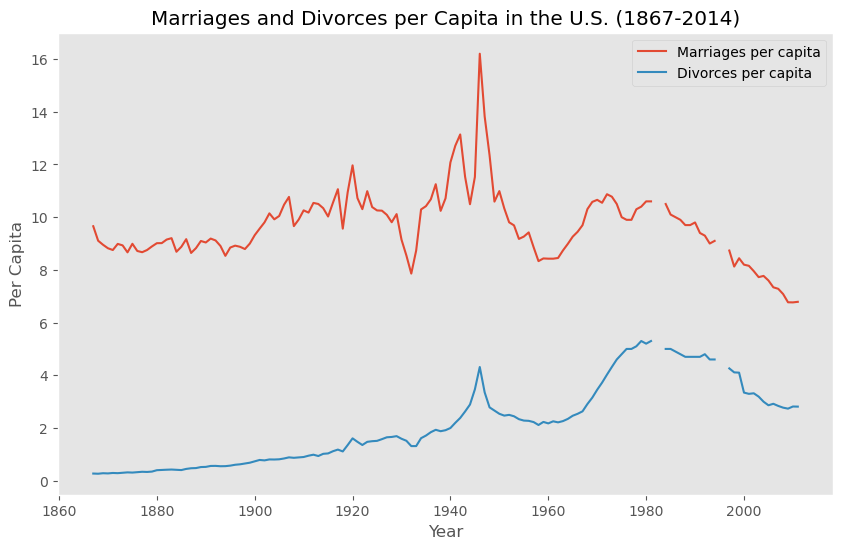

In [77]:
# Line plot
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Marriages_per_capita'], label='Marriages per capita')
plt.plot(data['Year'], data['Divorces_per_capita'], label='Divorces per capita')
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()
plt.grid()
plt.show()

# Question 7

A vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.


In [78]:
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
# Load the dataset
data = pd.read_csv("us-marriages-divorces-1867-2014.csv")

In [80]:
# Calculate marriages and divorces per capita
data['Marriages_per_capita'] = data['Marriages'] / data['Population'] * 1000
data['Divorces_per_capita'] = data['Divorces'] / data['Population'] * 1000

In [81]:
# Select data for the specified years
selected_years = [1900, 1950, 2000]
selected_data = data[data['Year'].isin(selected_years)]

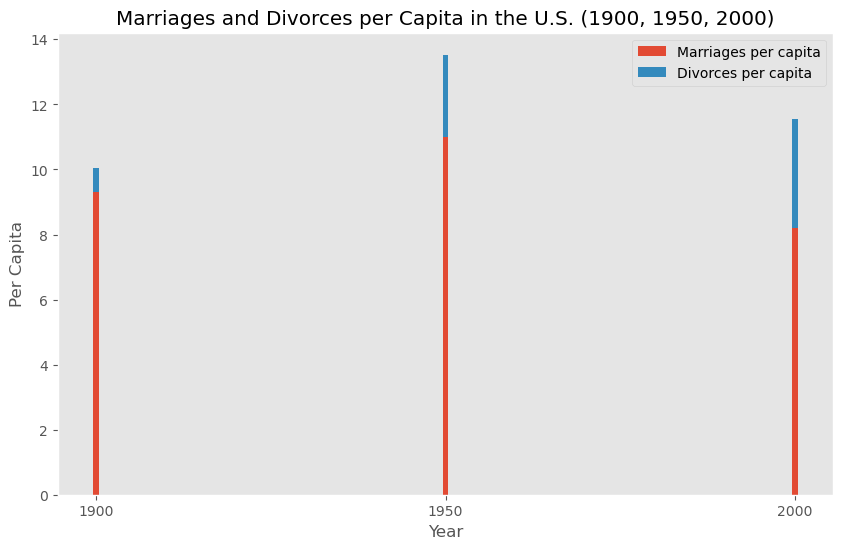

In [82]:
# Vertical bar chart
plt.figure(figsize=(10, 6))
plt.bar(selected_data['Year'], selected_data['Marriages_per_capita'], label='Marriages per capita')
plt.bar(selected_data['Year'], selected_data['Divorces_per_capita'], label='Divorces per capita', bottom=selected_data['Marriages_per_capita'])
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.legend()
plt.xticks(selected_years)
plt.grid()
plt.show()

# Question 8

A horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
# Load the dataset
data = pd.read_csv("actor_kill_counts.csv")

In [87]:
# Sort the data by kill count in descending order
data = data.sort_values(by='Count', ascending=True)

In [88]:
# Set ggplot style
plt.style.use('ggplot')

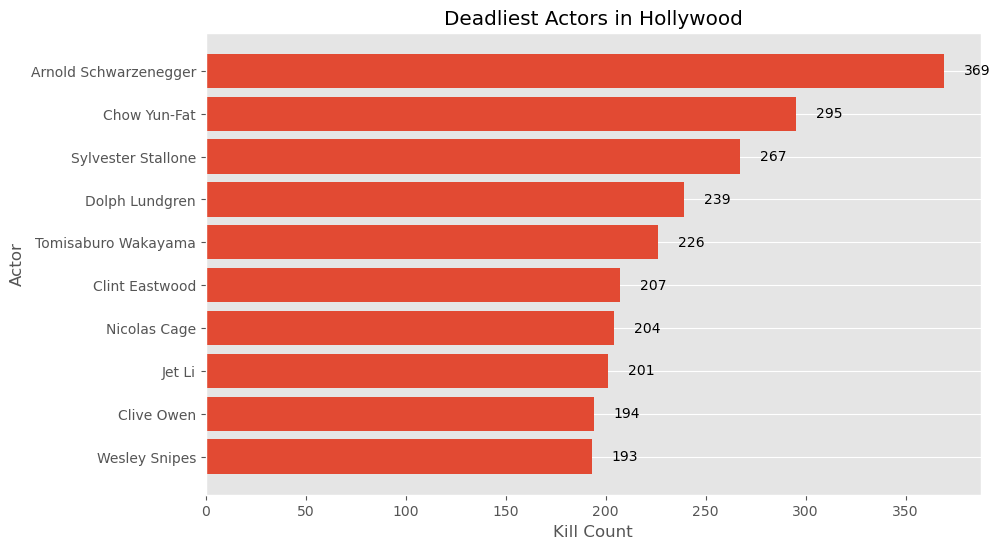

In [93]:
# Horizontal bar chart
plt.figure(figsize=(10, 6))
bar_plot = plt.barh(data['Actor'], data['Count'])

for bar in bar_plot:
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())), va='center')

plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.grid(axis='x')
plt.show()

# Question 9

Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.


Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
# Load the dataset
data_question9 = pd.read_csv("roman-emperor-reigns.csv")

In [98]:
# Count of the assasinations done on emperors
assassinated_count_emperors = data_question9[data_question9['Cause_of_Death'] == 'Assassinated'].shape[0]

In [99]:
# Count the assassinations that were not done on the emperors
not_assassinated_count_emperors = data_question9.shape[0] - assassinated_count

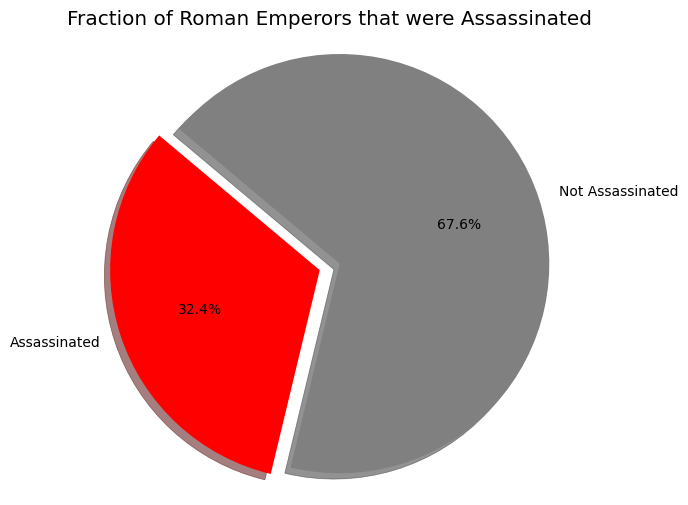

In [105]:
# Create a pie chart
labels = ['Assassinated', 'Not Assassinated']
sizes = [assassinated_count, not_assassinated_count_emperors]
colors = ['#FF0000', '#808080']
explode = (0.1, 0)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Fraction of Roman Emperors that were Assassinated')
plt.show()

# QUESTION 10
Create a scatter plot showing the relationship between the total revenue earned byarcades and the number of Computer Science PhDs awarded in the U.S. between2000 and 2009.

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
# Loading and extracting the dataset
dataset = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")
years = dataset['Year']
revenue = dataset['Total Arcade Revenue (billions)']
doctorates = dataset['Computer Science Doctorates Awarded (US)']

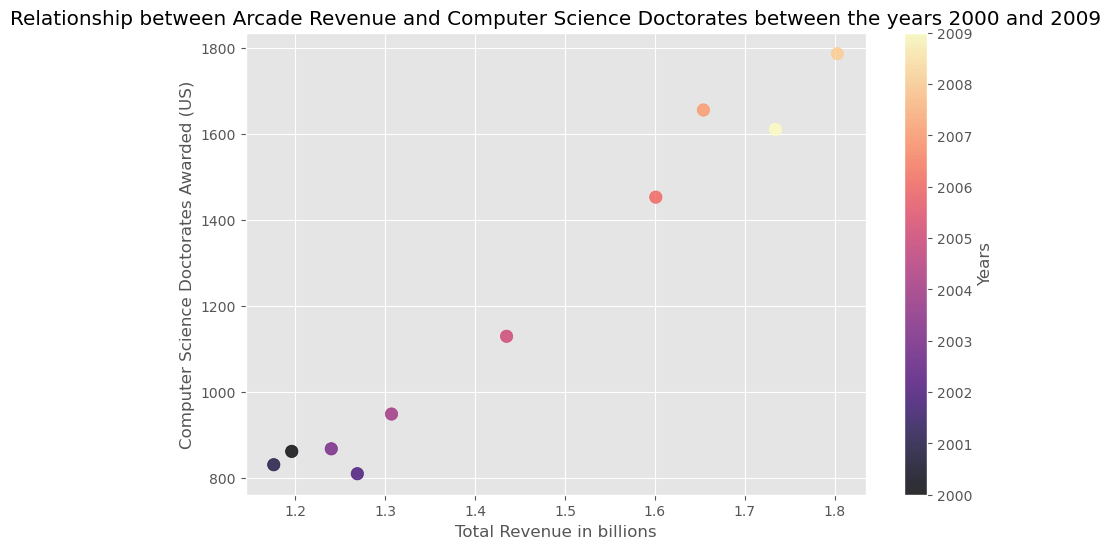

In [112]:
# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(revenue, doctorates, c=years, cmap='magma', s=80, alpha=0.8)
plt.colorbar(label='Years')
plt.xlabel('Total Revenue in billions')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and Computer Science Doctorates between the years 2000 and 2009')
plt.grid(True)
plt.show()